## Demo for modelling dual-channel PSF from SMLM data

#### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
main_data_dir = io.param.load('datapath.yaml').main_data_dir
import tensorflow as tf
import tensorflow as tf
main_data_dir = io.param.load('datapath.yaml').main_data_dir
try:
    gpus = tf.config.list_physical_devices('GPU')
    tf.config.experimental.set_memory_growth(gpus[0], True)
    print('Running on GPU')
except:
    print('Running on CPU')

Running on GPU


#### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='2ch',sysfile='M2')

#### Edit user defined parameters

In [3]:
L.param.datapath = main_data_dir+'/2ch_smlm_nup96_WGA/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'Pos0.' # keyword of the file name or the full file name without extension
L.param.gain = 0.05
L.param.ccd_offset = 400
L.param.option.insitu.stage_pos = 0.6 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.peak_height = 0.2 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.roi.roi_size = [21,21]
L.param.batch_size = 500 # lower this number if out of memory
L.param.option.model.const_pupilmag = True
L.param.option.imaging.emission_wavelength = 0.67 # micron
L.param.option.model.n_max = 6
L.param.option.insitu.z_range = 1.2
L.param.option.insitu.repeat=2
L.param.insitu.frame_range = [8000,10000]

#### Start learning

In [5]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:/EMBL files/data for PSF learning/example data for uiPSF//2ch_smlm_nup96_WGA\01_191009_u2os_course_96_WGA_3D_ritu_1_MMStack_Pos0.ome.tif
(2, 2000, 234, 256)
rois shape channel 0: (16094, 21, 21)
rois shape channel 1: (8603, 21, 21)
rois shape channel 0: (5122, 21, 21)
rois shape channel 1: (5122, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:00s]  1.17it/s total time: 0.85s
5/6: localization: 2/2 [00:00s] 14.61it/s total time: 0.98s
3/6: learning: 58/100 [00:49s]  1.17it/s, current loss: 0.65378, total time: 49.50s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.19it/s total time: 50.33s
5/6: localization: 2/2 [00:00s] 17.68it/s total time: 50.44s
3/6: learning: 55/100 [00:46s]  1.18it/s, current loss: 0.43769, total time: 96.23s
4/6: calculating spline coefficients: 2/2 [00:01s]  1.17it/s total time: 1.69s
5/6: localization: 2/2 [00:01s]  1.13it/s total time: 3.46s
c:\Users\Sheng\Documents\git\python\uiPSF\demo\..\psflearning\learning\psfs\PSFMultiChannel_smlm_file.py:111: ComplexWarning: Casting complex values to real discards the imaginary part
  zp = locres[-1]['z'].flatten()+np.float32(self.sub_psfs[0].Zoffset.flatten())
3/6: learning: 207/250 [02:50s]  1.22it/s, current loss: 1.01810, total time: 266.34s


outlier percentage: 0.255184331797235
rois shape channel 0: (1293, 21, 21)
rois shape channel 1: (1293, 21, 21)


3/6: learning: 208/250 [02:08s]  1.62it/s, current loss: 1.00291, total time: 394.56s
4/6: calculating spline coefficients: 2/2 [00:01s]  1.19it/s total time: 1.68s
5/6: localization: 2/2 [00:00s]  3.75it/s total time: 2.21s
6/6: saving results: [00:01s] total time: 4.09s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.17it/s total time: 0.84s
5/6: localization: 2/2 [00:00s]  6.31it/s total time: 1.16s
3/6: learning: 57/100 [00:48s]  1.18it/s, current loss: 0.65262, total time: 48.41s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.18it/s total time: 49.24s
5/6: localization: 2/2 [00:00s] 17.65it/s total time: 49.36s
3/6: learning: 55/100 [00:46s]  1.17it/s, current loss: 0.43878, total time: 95.36s
4/6: calculating spline coefficients: 2/2 [00:01s]  1.18it/s total time: 1.68s
5/6: localization: 2/2 [00:01s]  1.27it/s total time: 3.26s
3/6: learning: 205/250 [02:48s]  1.21it/s, current loss: 1.01712, total time: 264.34s


outlier percentage: 0.2546728971962616
rois shape channel 0: (1276, 21, 21)
rois shape channel 1: (1276, 21, 21)


3/6: learning: 203/250 [02:05s]  1.62it/s, current loss: 1.00246, total time: 389.50s
4/6: calculating spline coefficients: 2/2 [00:01s]  1.17it/s total time: 1.70s
5/6: localization: 2/2 [00:00s]  2.84it/s total time: 2.40s
6/6: saving results: [00:02s] total time: 4.52s


#### Show results

In [6]:
f,p = io.h5.load(resfile) # load result file

channel 0


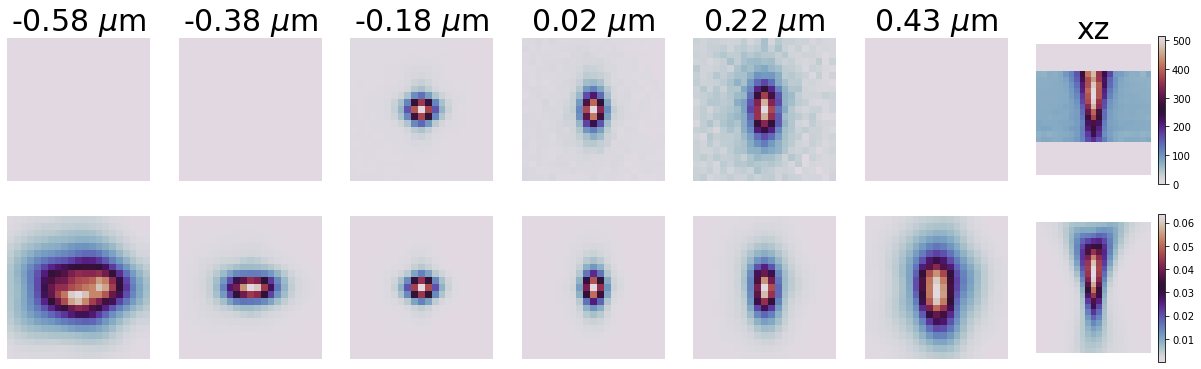

channel 1


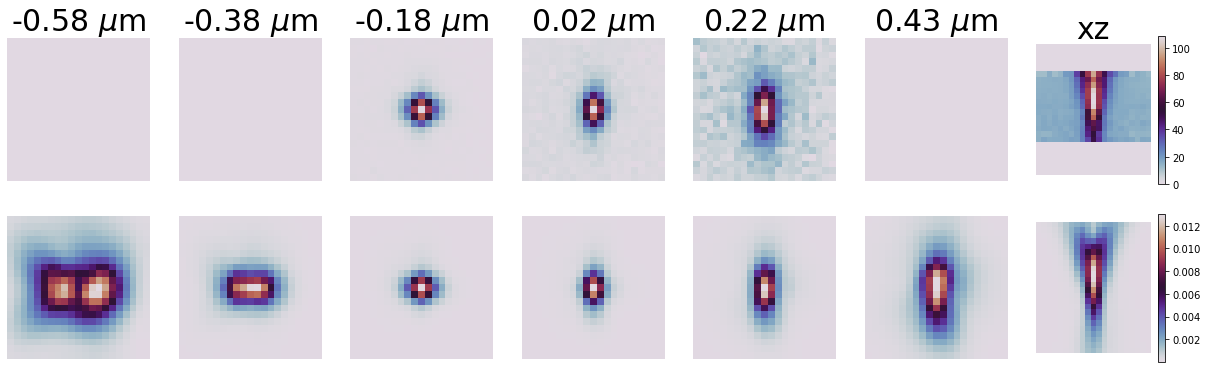

In [8]:
showpsfvsdata_insitu(f,p)

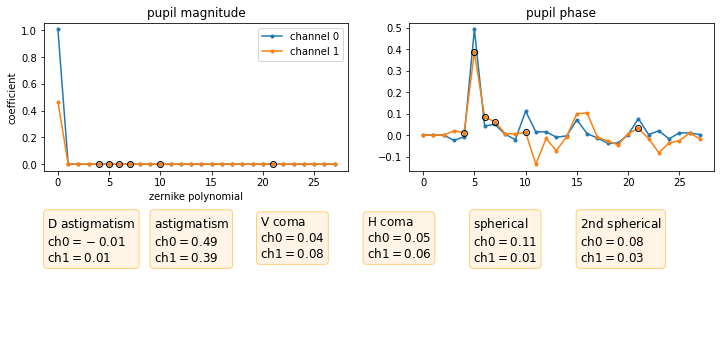

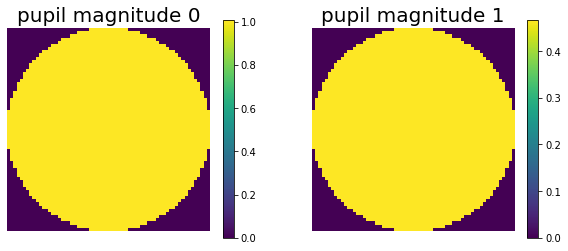

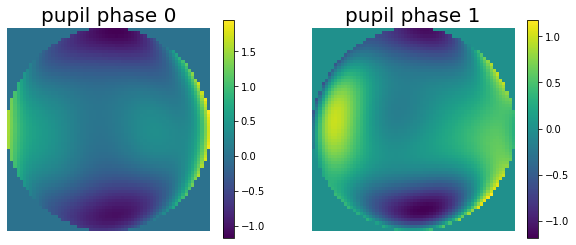

In [9]:
try:
    showzernike(f,p)
except:
    try: 
        showpupil(f,p)
    except:
        print('no pupil')

##### Optional plots

[[ 0.9986 -0.0501 -0.    ]
 [ 0.0503  0.9977 -0.    ]
 [-2.6935  4.0427  1.    ]]


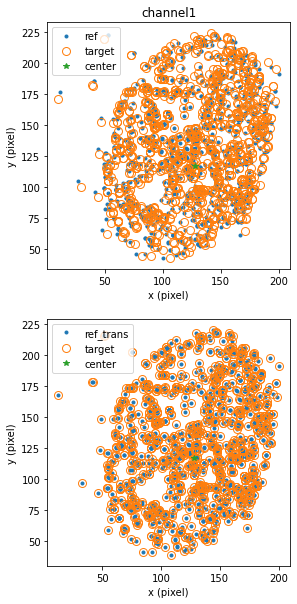

In [10]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

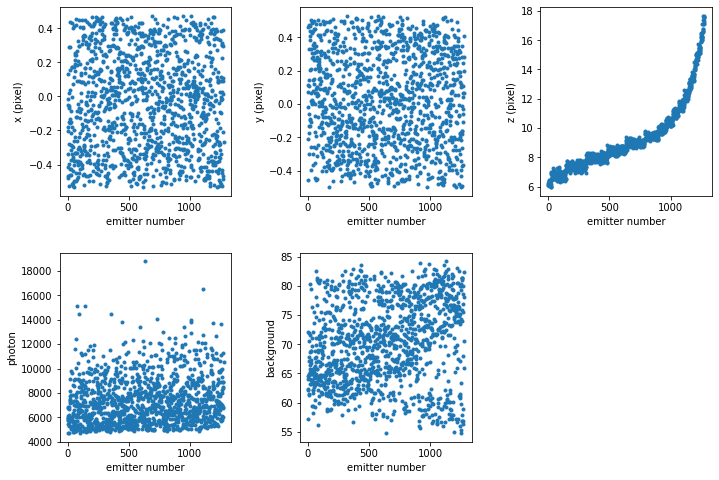

In [11]:
showlearnedparam_insitu(f,p)

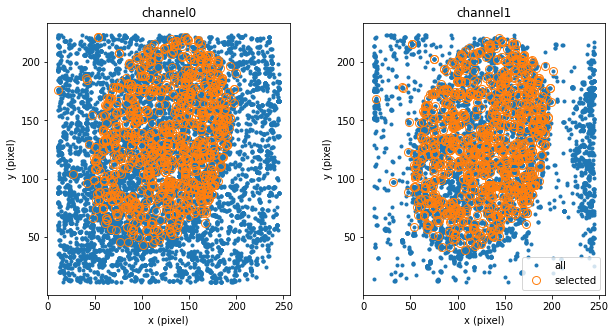

In [12]:
showcoord(f,p)

#### Ouput parameters

In [21]:
print('f:\n    ',list(f.keys()))
print(' locres:\n    ',list(f.locres.keys()))
print(' res:\n    ',list(f.res.keys()))
print(' rois:\n    ',list(f.rois.keys()))

f:
     ['locres', 'res', 'rois']
 locres:
     ['CRLB', 'LL', 'P', 'coeff', 'coeff_bead', 'coeff_reverse', 'loc']
 res:
     ['T', 'channel0', 'channel1', 'imgcenter', 'xyshift']
 rois:
     ['cor', 'fileID', 'image_size', 'psf_data', 'psf_fit']
